In [1]:
import pandas
import pickle
import os
import datetime
import pybamm
import matplotlib.pyplot as plt
from scipy import integrate
%matplotlib widget

In [2]:
model = pybamm.lithium_ion.SPMe() 
parameter_values = pybamm.ParameterValues(chemistry=pybamm.parameter_sets.Siegel2022)

In [3]:
# pybamm.set_logging_level("NOTICE")
experiment = pybamm.Experiment(
    [
        ("Discharge at "+"0.3A"+" for 60 min", 
         "Rest for 15 min",
         "Charge at "+ "3A"+" for 10 sec", 
         "Rest for 5 min",
         "Discharge at "+ "3A"+ " for 10 sec", 
         "Rest for 5 min",
         "Charge at "+ "1.5A"+ " for 3.33 sec", 
         "Rest for 5 min",
         "Discharge at "+ "1.5A"+ " for 3.33 sec", 
         "Rest for 5 min",
         )
    ]*1,
#     cccv_handling="ode",
)

In [4]:
sim = pybamm.Simulation(model, parameter_values=parameter_values, experiment=experiment,solver=pybamm.CasadiSolver(mode="safe"))
sim.solve(initial_soc =.9)
solution0 = sim.solution

In [5]:
t0 =  solution0["Time [s]"].entries
V0 =  solution0["Terminal voltage [V]"].entries
I0 =  solution0["Current [A]"].entries
Q0 = -solution0['Discharge capacity [A.h]'].entries

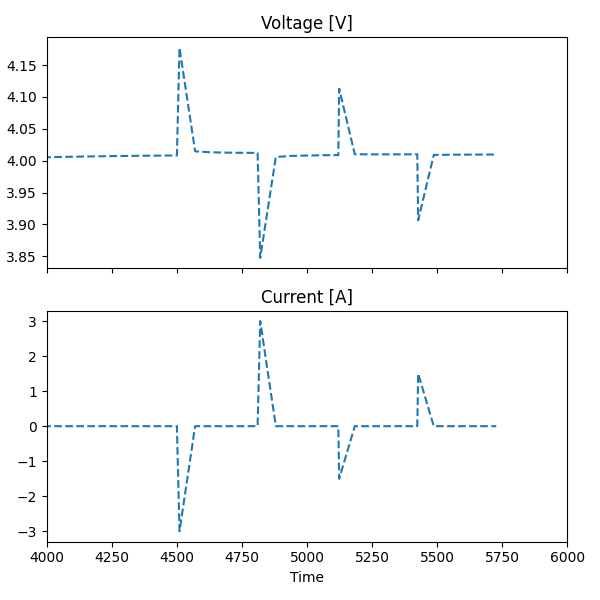

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(6, 6),sharex=True)
ax1 = axes.flat[0]
ax1.plot(t0, V0, '--')
ax1.set_title("Voltage [V]")
# ax2 = axes.flat[1]
# ax2.plot(t0, Q0, '--')
# ax2.set_title("Capacity [Ah]")
ax3 = axes.flat[1]
ax3.plot(t0, I0, '--')
ax1.set_xlim([4000,6000])
ax3.set_xlabel("Time")
ax3.set_title("Current [A]")
fig.tight_layout()
plt.savefig('sample_hppc_sim.png')

In [7]:
# pybamm.set_logging_level("NOTICE")
parameter_values = pybamm.ParameterValues(chemistry=pybamm.parameter_sets.Siegel2022)
experiment = pybamm.Experiment(
    [
        "Discharge at "+"0.05A"+" until 3V", 
         
    ],
#     cccv_handling="ode",
)

In [8]:
sim = pybamm.Simulation(model, parameter_values=parameter_values, experiment=experiment,solver=pybamm.CasadiSolver(mode="safe"))
sim.solve(initial_soc =1)
solution1 = sim.solution

In [9]:
t1 =  solution1["Time [s]"].entries
V1 =  solution1["Terminal voltage [V]"].entries
I1 =  solution1["Current [A]"].entries
Q1 = -solution1['Discharge capacity [A.h]'].entries

cs_sur_n1 = solution1["X-averaged negative particle surface concentration"].entries
cs_sur_p1 = solution1["X-averaged positive particle surface concentration"].entries
cs_ave_n1 = solution1["Negative electrode volume-averaged concentration"].entries
cs_ave_p1 = solution1["Positive electrode volume-averaged concentration"].entries

In [10]:
# fig, axes = plt.subplots(3, 1, figsize=(6, 6))
# ax1 = axes.flat[0]
# ax1.plot(t1/3600, V1, '--')
# ax1.set_title("Voltage [V]")
# ax2 = axes.flat[1]
# ax2.plot(t1/3600, Q1, '--')
# ax2.set_title("Capacity [Ah]")
# ax3 = axes.flat[2]
# ax3.plot(t1/3600, I1, '--')
# ax3.set_xlabel("Time")
# ax3.set_title("Current [A]")
# fig.tight_layout()
# plt.savefig('sample_hppc_sim.png')

In [11]:
parameter_values = pybamm.ParameterValues(chemistry=pybamm.parameter_sets.Siegel2022)
parameter_values.update(
        {
            "Negative electrode diffusion coefficient [m2.s-1]": 5.0E-17, #5.0E-15
            "Negative electrode reference exchange-current density [A.m-2(m3.mol)1.5]": 1.061E-7, #1.061E-6

        },
        check_already_exists=False,
    )

In [12]:
parameter_values.search("Negative electrode diffusion")

Negative electrode diffusion coefficient [m2.s-1]	5e-17


In [13]:
sim = pybamm.Simulation(model, parameter_values=parameter_values, experiment=experiment,solver=pybamm.CasadiSolver(mode="safe"))
sim.solve(initial_soc =1)
solution2 = sim.solution

In [14]:
t2 =  solution2["Time [s]"].entries
V2 =  solution2["Terminal voltage [V]"].entries
I2 =  solution2["Current [A]"].entries
Q2 = -solution2['Discharge capacity [A.h]'].entries

cs_sur_n2 = solution2["X-averaged negative particle surface concentration"].entries
cs_sur_p2 = solution2["X-averaged positive particle surface concentration"].entries
cs_ave_n2 = solution2["Negative electrode volume-averaged concentration"].entries
cs_ave_p2 = solution2["Positive electrode volume-averaged concentration"].entries

In [15]:
Q2[-1]

-4.072942707904914

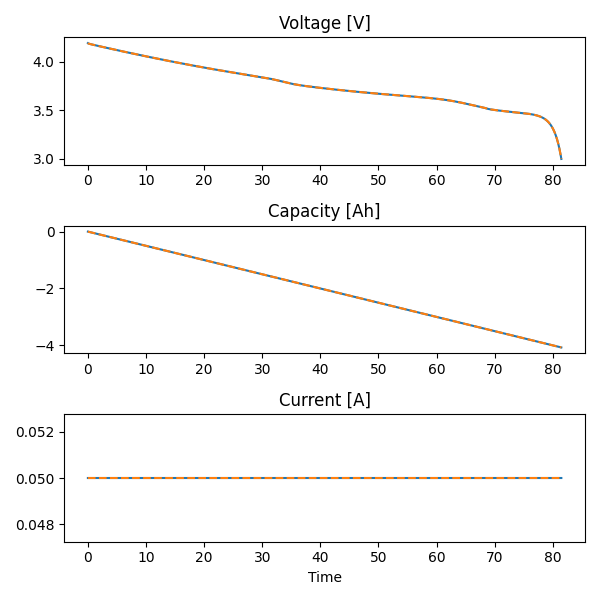

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(6, 6))
ax1 = axes.flat[0]
ax1.plot(t1/3600, V1, t2/3600, V2, '--')
ax1.set_title("Voltage [V]")
ax2 = axes.flat[1]
ax2.plot(t1/3600, Q1, t2/3600, Q2, '--')
ax2.set_title("Capacity [Ah]")
ax3 = axes.flat[2]
ax3.plot(t1/3600, I1, t2/3600, I2, '--')
ax3.set_xlabel("Time")
ax3.set_title("Current [A]")
fig.tight_layout()
# plt.savefig('sample_hppc_sim.png')

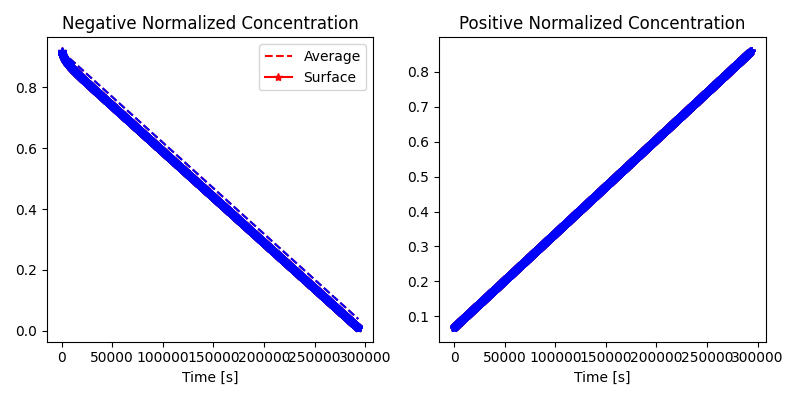

In [17]:
fig, axes = plt.subplots(1, 2, figsize=( 8, 4), sharex=True)
ax1 = axes.flat[0]
ax1.plot( t1, cs_ave_n1, 'r--', t1, cs_sur_n1,'r-*')
ax1.plot( t2, cs_ave_n2, 'b--', t2, cs_sur_n2,'b-*')
ax1.set_title("Negative Normalized Concentration")
# ax1.set_ylim([0.7,0.9])
ax1.set_xlabel("Time [s]")
ax2 = axes.flat[1]
ax2.plot( t1, cs_ave_p1, 'r--', t1, cs_sur_p1,'r-*')
ax2.plot( t2, cs_ave_p2, 'b--', t2, cs_sur_p2,'b-*')
ax2.set_title("Positive Normalized Concentration")
# ax2.set_ylim([0.08,0.15])
ax2.set_xlabel("Time [s]")
# ax1.set_xlim([20370,20470])
ax1.legend(['Average','Surface'])
fig.tight_layout()
plt.show()